# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [3]:
del heroes_df['Unnamed: 0']
heroes_df.columns

Index(['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object')

## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [4]:
print(heroes_df.info())
print(powers_df.info())
print(powers_df.columns)
display(powers_df.head())
display(heroes_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      734 non-null    object 
 2   Eye color   734 non-null    object 
 3   Race        734 non-null    object 
 4   Hair color  734 non-null    object 
 5   Height      734 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  734 non-null    object 
 8   Alignment   734 non-null    object 
 9   Weight      732 non-null    float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB
None
Index(['hero_names', 'Agility', 'Accelerated Healing', 'Lantern Power Ring',
       'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth',
       'Energy 

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________
By summing the missing values of each column in the heroes dataframe, we find that only the "Publisher" and "Weight" columns contains NA values. About 2% of the publisher data and 0.27% of the weight data are missing values. For the publisher column, replacing NA values with "Unknown" would allow us to maintain the data in those 15 rows. Since the data in 'publisher' is categorical, this replacement will not affect summary statistics of the variable. Removal was the chosen option for missing values in the 'weight' column. Eliminating these values will not cost us a lot of data, and will not significantly affect analyses of the column. There are also impossible weight values of -99, which were replaced with the median weight. Given the handful of extreme values in the dataframe, median was a more representative choice than the mean. Fortunately, the powers dataframe does not appear to have any missing values. It is possible that both dateframes may contain placeholder values for missing data, but since detecting them would entail inspecting every column, any placeholders will be dealt with as they are encountered in the analysis. 

In [5]:
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [6]:
print(heroes_df['Publisher'].unique()) 
len(heroes_df['Publisher'])

['Marvel Comics' 'Dark Horse Comics' 'DC Comics' 'NBC - Heroes'
 'Wildstorm' 'Image Comics' nan 'Icon Comics' 'SyFy' 'Hanna-Barbera'
 'George Lucas' 'Team Epic TV' 'South Park' 'HarperCollins' 'ABC Studios'
 'Universal Studios' 'Star Trek' 'IDW Publishing' 'Shueisha'
 'Sony Pictures' 'J. K. Rowling' 'Titan Books' 'Rebellion' 'Microsoft'
 'J. R. R. Tolkien']


734

In [7]:
heroes_df['Publisher'].fillna('Unknown', inplace=True)
heroes_df['Publisher'].unique()

array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Wildstorm', 'Image Comics', 'Unknown', 'Icon Comics', 'SyFy',
       'Hanna-Barbera', 'George Lucas', 'Team Epic TV', 'South Park',
       'HarperCollins', 'ABC Studios', 'Universal Studios', 'Star Trek',
       'IDW Publishing', 'Shueisha', 'Sony Pictures', 'J. K. Rowling',
       'Titan Books', 'Rebellion', 'Microsoft', 'J. R. R. Tolkien'],
      dtype=object)

In [8]:
print(heroes_df['Weight'].unique()) 
len(heroes_df['Weight'])
print(np.nanmedian(heroes_df['Weight']))
print(np.mean(heroes_df['Weight']))
print(np.std(heroes_df['Weight']))

[441.  65.  90. -99. 122.  88.  61.  81. 104. 108.  72. 169. 173. 101.
  68.  57.  54.  83.  86. 358. 135. 106. 146.  63.  98. 270.  59.  50.
 126.  67. 180.  77.  52.  95.  79. 133. 181. 216.  71. 124. 155. 113.
  58.  92.  97.  56. 230. 495.  55. 110.  99. 158.  74. 116.  62. 170.
  70.  78. 225. 817.  27.  91. 178. 383. 171. 187. 132.  89. 412. 306.
  80. 203.  96.  18.  45. 167.  16. 630. 268.  nan 115.   4.  48. 119.
 207. 191.   2.  14.  49. 855. 356. 324. 360. 288. 236.  36. 140. 128.
 338. 248. 125.  85. 293.  69. 405. 117.  87. 234. 320.  38.  25. 900.
 310. 149. 315. 153. 437. 131.  47. 176. 198. 443. 143.  76.  82. 105.
 331. 214.  73. 334.  41. 162.  39. 473.  51.  17.]
62.0
43.8551912568306
130.734341706631


In [9]:
heroes_df.dropna(inplace=True)
heroes_df['Weight'] = heroes_df['Weight'].replace([-99],62)

In [10]:
powers_df.isna().sum()

hero_names               0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
                        ..
Phoenix Force            0
Molecular Dissipation    0
Vision - Cryo            0
Omnipresent              0
Omniscient               0
Length: 168, dtype: int64

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [11]:
#Function to find duplicate columns
def find_duplicates(df1, df2):
    for column in df1:
        if column in df2:
            return column
        else:
            return "No duplicates found"

In [12]:
find_duplicates(heroes_df, powers_df)

'No duplicates found'

In [13]:
#Because there are no duplicates, we can do a full join of the dataframes.
superheroes = heroes_df.join(powers_df, how='outer')
superheroes.columns

Index(['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Skin color', 'Alignment', 'Weight',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=178)

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

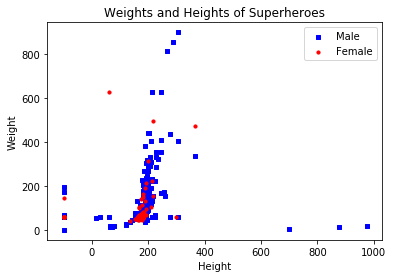

In [14]:
male = superheroes[superheroes['Gender'] == 'Male']
female = superheroes[superheroes['Gender'] == 'Female']

x = [male['Height'], female['Height']]
y = [male['Weight'], female['Weight']]
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x[0], y[0], s=10, c='b', marker="s", label='Male')
ax1.scatter(x[1],y[1], s=10, c='r', marker="o", label='Female')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Weights and Heights of Superheroes')
plt.legend(loc='upper right');
plt.show()

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [15]:
male_heroes_df = male
female_heroes_df = female

def show_distplot(dataframe, column_name):
    sns.distplot(a=dataframe[column_name])

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


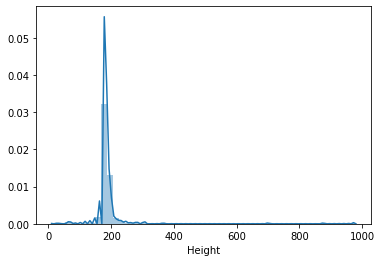

In [16]:
# Male Height
male['Height'] = male['Height'].replace(-99.0, np.median(male['Height']))
show_distplot(male, 'Height')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/series.py:4494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


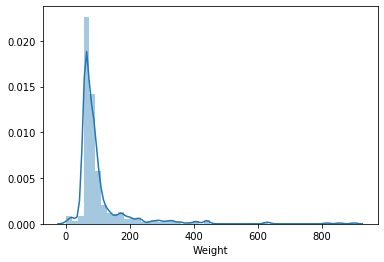

In [17]:
# Male Weight
male['Weight'].dropna(inplace=True)
male['Weight'].replace(-99.0, np.median(male['Weight']))
show_distplot(male, 'Weight')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


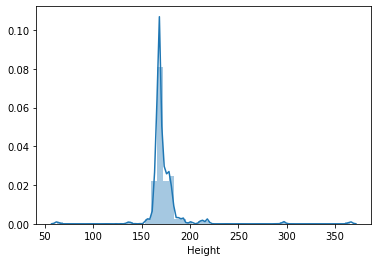

In [18]:
# Female Height
female['Height'] = female['Height'].replace(-99.0, np.median(female['Height']))
show_distplot(female, 'Height')

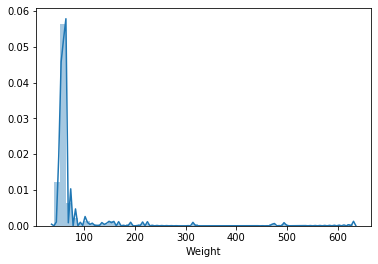

In [19]:
# Female Weight
show_distplot(female, 'Weight')

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________
When plotting the heights and weights, it was discovered that some NaN and '-99' still remained in the subsetted data, so these values were removed prior to running the function again. All of the plots show a unimodal, asymmetric distribution, with more data falling above rather than below the peak. This makes intuitive sense: while most superheroes are approximately human-sized, some--like the Hulk--are giants whose height and weight fall far above average. The plots for female superheroes peak at lower points than the male superheroes, which follows a similar pattern to humans. 

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [20]:
for c in powers_df.columns[2:]:
    print(pd.value_counts(powers_df[c]))

False    489
True     178
Name: Accelerated Healing, dtype: int64
False    656
True      11
Name: Lantern Power Ring, dtype: int64
False    642
True      25
Name: Dimensional Awareness, dtype: int64
False    620
True      47
Name: Cold Resistance, dtype: int64
False    410
True     257
Name: Durability, dtype: int64
False    541
True     126
Name: Stealth, dtype: int64
False    590
True      77
Name: Energy Absorption, dtype: int64
False    455
True     212
Name: Flight, dtype: int64
False    637
True      30
Name: Danger Sense, dtype: int64
False    646
True      21
Name: Underwater breathing, dtype: int64
False    548
True     119
Name: Marksmanship, dtype: int64
False    562
True     105
Name: Weapons Master, dtype: int64
False    659
True       8
Name: Power Augmentation, dtype: int64
False    642
True      25
Name: Animal Attributes, dtype: int64
False    554
True     113
Name: Longevity, dtype: int64
False    509
True     158
Name: Intelligence, dtype: int64
True     360
False   

In [21]:
Top_5 = []
for c in powers_df.columns[2:]:
    if sum(powers_df[c]) >= 210:
        Top_5.append(c)
Top_5

['Durability', 'Flight', 'Super Strength', 'Stamina', 'Super Speed']

In [22]:
Marvel = superheroes[superheroes['Publisher'] == 'Marvel Comics']
Marvel.dropna(inplace=True)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
for c in Marvel.columns[11:]:
    print(pd.value_counts(Marvel[c]))

False    228
True     113
Name: Agility, dtype: int64
False    256
True      85
Name: Accelerated Healing, dtype: int64
False    334
True       7
Name: Lantern Power Ring, dtype: int64
False    328
True      13
Name: Dimensional Awareness, dtype: int64
False    320
True      21
Name: Cold Resistance, dtype: int64
False    203
True     138
Name: Durability, dtype: int64
False    289
True      52
Name: Stealth, dtype: int64
False    301
True      40
Name: Energy Absorption, dtype: int64
False    229
True     112
Name: Flight, dtype: int64
False    331
True      10
Name: Danger Sense, dtype: int64
False    333
True       8
Name: Underwater breathing, dtype: int64
False    285
True      56
Name: Marksmanship, dtype: int64
False    298
True      43
Name: Weapons Master, dtype: int64
False    338
True       3
Name: Power Augmentation, dtype: int64
False    331
True      10
Name: Animal Attributes, dtype: int64
False    283
True      58
Name: Longevity, dtype: int64
False    265
True      76


In [24]:
Top_5_Marvel = []
for c in Marvel.columns[11:]:
    if sum(Marvel[c]) >= 113:
        Top_5_Marvel.append(c)
Top_5_Marvel

['Agility', 'Durability', 'Super Strength', 'Stamina', 'Super Speed']

In [25]:
DC = superheroes[superheroes['Publisher'] == 'DC Comics']
DC.dropna(inplace=True)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
for c in DC.columns[11:]:
    print(pd.value_counts(DC[c]))

False    121
True      81
Name: Agility, dtype: int64
False    151
True      51
Name: Accelerated Healing, dtype: int64
False    200
True       2
Name: Lantern Power Ring, dtype: int64
False    193
True       9
Name: Dimensional Awareness, dtype: int64
False    186
True      16
Name: Cold Resistance, dtype: int64
False    126
True      76
Name: Durability, dtype: int64
False    151
True      51
Name: Stealth, dtype: int64
False    183
True      19
Name: Energy Absorption, dtype: int64
False    145
True      57
Name: Flight, dtype: int64
False    188
True      14
Name: Danger Sense, dtype: int64
False    193
True       9
Name: Underwater breathing, dtype: int64
False    163
True      39
Name: Marksmanship, dtype: int64
False    162
True      40
Name: Weapons Master, dtype: int64
False    200
True       2
Name: Power Augmentation, dtype: int64
False    195
True       7
Name: Animal Attributes, dtype: int64
False    173
True      29
Name: Longevity, dtype: int64
False    150
True      52


Name: Vision - Night, dtype: int64
False    197
True       5
Name: Vision - Infrared, dtype: int64
False    201
True       1
Name: Grim Reaping, dtype: int64
False    201
True       1
Name: Matter Absorption, dtype: int64
False    200
True       2
Name: The Force, dtype: int64
False    200
True       2
Name: Resurrection, dtype: int64
False    202
Name: Terrakinesis, dtype: int64
False    197
True       5
Name: Vision - Heat, dtype: int64
False    202
Name: Vitakinesis, dtype: int64
False    201
True       1
Name: Radar Sense, dtype: int64
False    201
True       1
Name: Qwardian Power Ring, dtype: int64
False    200
True       2
Name: Weather Control, dtype: int64
False    198
True       4
Name: Vision - X-Ray, dtype: int64
False    198
True       4
Name: Vision - Thermal, dtype: int64
False    196
True       6
Name: Web Creation, dtype: int64
False    196
True       6
Name: Reality Warping, dtype: int64
False    200
True       2
Name: Odin Force, dtype: int64
False    199
True       

In [27]:
Top_5_DC = []
for c in DC.columns[11:]:
    if sum(DC[c]) >= 70:
        Top_5_DC.append(c)
Top_5_DC

['Agility', 'Durability', 'Super Strength', 'Stamina', 'Super Speed']

In [28]:
print(Top_5_Marvel)
print(Top_5_DC)
print(Top_5)

['Agility', 'Durability', 'Super Strength', 'Stamina', 'Super Speed']
['Agility', 'Durability', 'Super Strength', 'Stamina', 'Super Speed']
['Durability', 'Flight', 'Super Strength', 'Stamina', 'Super Speed']


Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________
The lists of top 5 superpowers for the DC and Marvel comics are identical. For the whole dataset, super strength, stamina, super speed and durability overlap. However, agility is not included in the general top 5 list, while flight is. Agility is more common among DC and Marvel superheroes than among the general superhero population. 

### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________

The value counts and histograms below explore the distribution of hair and eye colors among 3 different races of superheroes: cyborgs, androids, and aliens.

Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [29]:
#Subsetting
superheroes['Hair color'] = superheroes['Hair color'].replace(['-'],'Unknown')
superheroes['Eye color'] = superheroes['Eye color'].replace(['-'],'Unknown')

cyborgs = superheroes[superheroes['Race'] == 'Cyborg']
androids = superheroes[superheroes['Race'] == 'Android']
aliens = superheroes[superheroes['Race'] == 'Alien']

In [30]:
#Cleaning 
cyborgs.dropna(inplace=True)
androids.dropna(inplace=True)
aliens.dropna(inplace=True)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [31]:
#Exploring
print('Cyborgs')
print(cyborgs['Hair color'].value_counts())
print(cyborgs['Eye color'].value_counts())

Cyborgs
Black      5
Unknown    3
Brownn     1
No Hair    1
Grey       1
Name: Hair color, dtype: int64
brown      4
red        2
blue       2
white      1
yellow     1
Unknown    1
Name: Eye color, dtype: int64


In [32]:
print('Androids')
print(androids['Hair color'].value_counts())
print(androids['Eye color'].value_counts())

Androids
No Hair    3
Brown      2
Unknown    2
Name: Hair color, dtype: int64
green      3
white      1
yellow     1
red        1
Unknown    1
Name: Eye color, dtype: int64


In [33]:
print('Aliens')
print(aliens['Hair color'].value_counts())
print(aliens['Eye color'].value_counts())

Aliens
White      3
Purple     1
No Hair    1
Black      1
Orange     1
Name: Hair color, dtype: int64
red        3
white      3
Unknown    1
Name: Eye color, dtype: int64


Text(0.5, 1.0, 'Distribution of Hair and Eye Color Among Cyborgs')

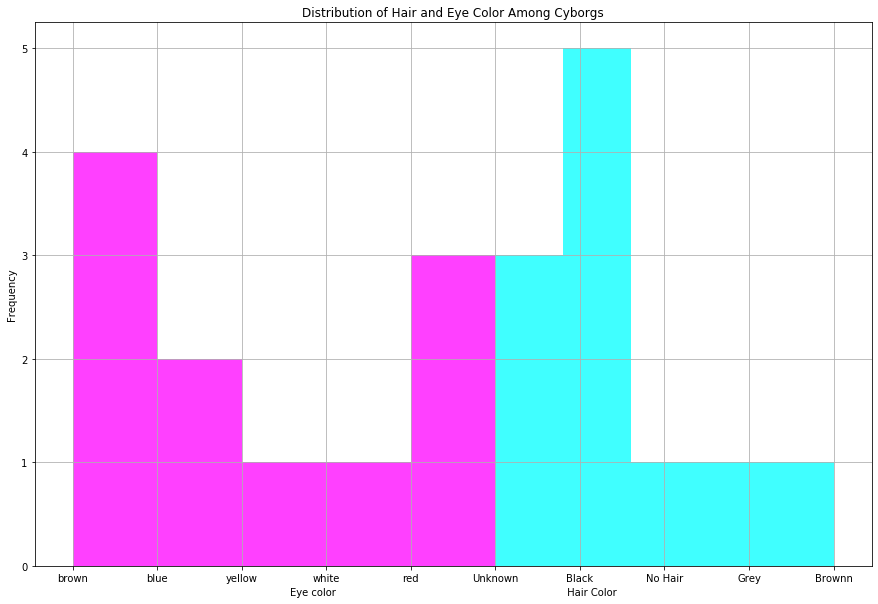

In [34]:
#Visualizing
fig= plt.figure(figsize=(15,10))
plt.hist(x=cyborgs['Eye color'], bins='auto', color='magenta',
                            alpha=0.75, rwidth=1)
plt.hist(x=cyborgs['Hair color'], bins='auto', color='cyan',
                            alpha=0.75, rwidth=1)
plt.grid(axis='y')
plt.grid(axis='x')
plt.xlabel('Eye color' + '                                                                          ' + 'Hair Color')
plt.ylabel('Frequency')
plt.title('Distribution of Hair and Eye Color Among Cyborgs')

In [35]:
print(androids['Hair color'].value_counts())
print(androids['Eye color'].value_counts())

No Hair    3
Brown      2
Unknown    2
Name: Hair color, dtype: int64
green      3
white      1
yellow     1
red        1
Unknown    1
Name: Eye color, dtype: int64


Text(0.5, 1.0, 'Distribution of Hair and Eye Color Among Androids')

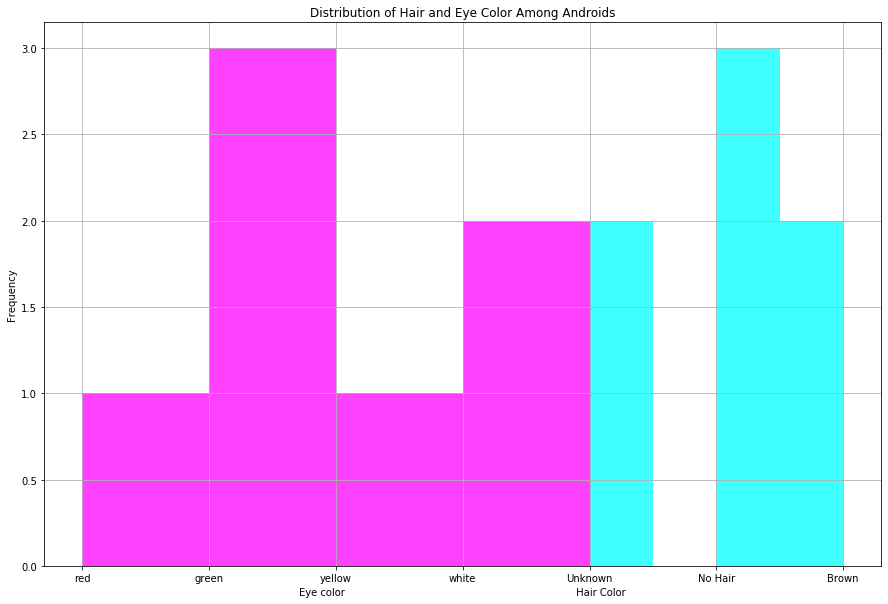

In [36]:
fig= plt.figure(figsize=(15,10))
plt.hist(x=androids['Eye color'], bins='auto', color='magenta',
                            alpha=0.75, rwidth=1)
plt.hist(x=androids['Hair color'], bins='auto', color='cyan',
                            alpha=0.75, rwidth=1)
plt.grid(axis='y')
plt.grid(axis='x')
plt.xlabel('Eye color' + '                                                                          ' + 'Hair Color')
plt.ylabel('Frequency')
plt.title('Distribution of Hair and Eye Color Among Androids')

In [37]:
print(aliens['Hair color'].value_counts())
print(aliens['Eye color'].value_counts())

White      3
Purple     1
No Hair    1
Black      1
Orange     1
Name: Hair color, dtype: int64
red        3
white      3
Unknown    1
Name: Eye color, dtype: int64


Text(0.5, 1.0, 'Distribution of Hair and Eye Color Among Aliens')

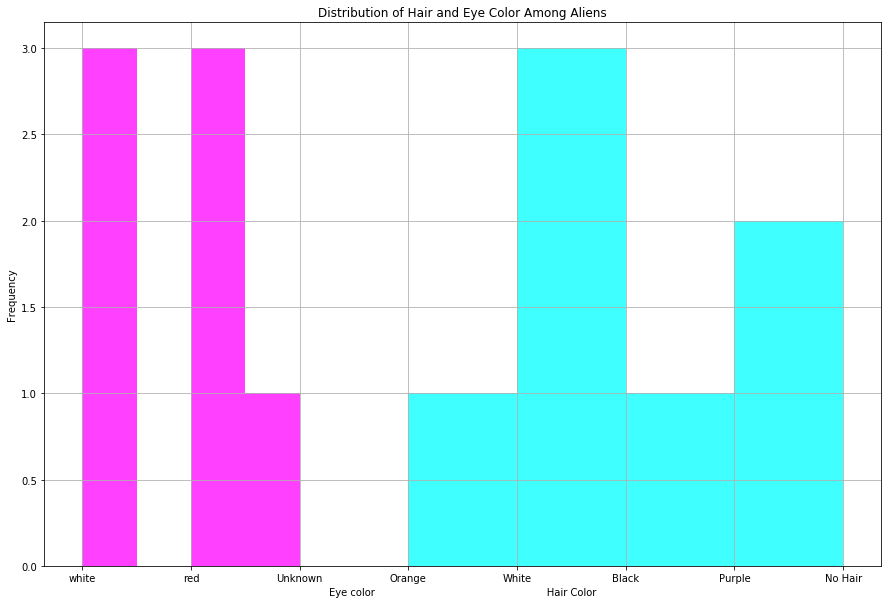

In [38]:
fig= plt.figure(figsize=(15,10))
plt.hist(x=aliens['Eye color'], bins='auto', color='magenta',
                            alpha=0.75, rwidth=1)
plt.hist(x=aliens['Hair color'], bins='auto', color='cyan',
                            alpha=0.75, rwidth=1)
plt.grid(axis='y')
plt.grid(axis='x')
plt.xlabel('Eye color' + '                                                       ' + 'Hair Color')
plt.ylabel('Frequency')
plt.title('Distribution of Hair and Eye Color Among Aliens')

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data